<a href="https://colab.research.google.com/github/shiva650897/Credit-card-default-prediction/blob/master/Models_without_sampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## LR without sampling

In [0]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score,auc

In [0]:
X_unsamples=df.drop('default',axis=1)
y_unsamples=df.default

In [0]:
X_unsamples.shape

(30000, 32)

In [0]:
X_train1,X_test1,y_train1,y_test1=train_test_split(X_unsamples,y_unsamples,test_size=0.3,random_state=1234)

In [0]:
X_train1.shape,y_train1.shape

((21000, 32), (21000,))

In [0]:
lr=LogisticRegression()

In [0]:
lr_model1=lr.fit(X_train1,y_train1)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [0]:
pred_1=lr_model1.predict(X_test1)

In [0]:
accuracy_score(y_test1,pred_1)

0.7763333333333333

In [0]:
confusion_matrix(y_test1, pred_1)

array([[6987,    0],
       [2013,    0]])

In [0]:
from sklearn.metrics import classification_report

In [0]:
# create classification report
print(classification_report(y_test1, pred_1, target_names=['not default', 'default']))

              precision    recall  f1-score   support

 not default       0.78      1.00      0.87      6987
     default       0.00      0.00      0.00      2013

    accuracy                           0.78      9000
   macro avg       0.39      0.50      0.44      9000
weighted avg       0.60      0.78      0.68      9000



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


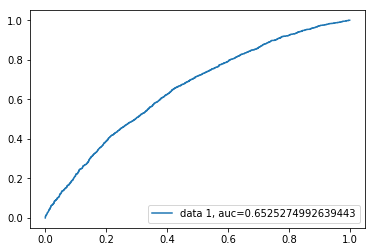

In [0]:
test_pred_proba = lr_model1.predict_proba(X_test1)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test1,  test_pred_proba)
auc = metrics.roc_auc_score(y_test1, test_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

## Decision Tree with out sampling

In [0]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier

In [0]:
DT=DecisionTreeClassifier()

In [0]:
DT1=DT.fit(X_train1,y_train1)

In [0]:
predydt1=DT1.predict(X_test1)

In [0]:
print(classification_report(y_test1,predydt1))

              precision    recall  f1-score   support

           0       0.83      0.82      0.83      6987
           1       0.41      0.44      0.42      2013

    accuracy                           0.73      9000
   macro avg       0.62      0.63      0.62      9000
weighted avg       0.74      0.73      0.74      9000



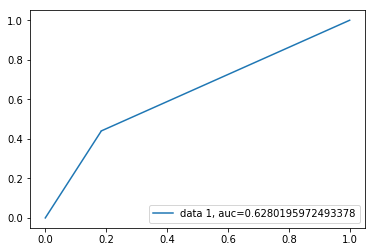

In [0]:
test_pred_proba = DT1.predict_proba(X_test1)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test1,  test_pred_proba)
auc = metrics.roc_auc_score(y_test1, test_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

## Random Forest  with out sampling




In [0]:
rf = RandomForestClassifier()

In [0]:
rf1=rf.fit(X_train1,y_train1)
predyrf1=rf1.predict(X_test1)
print(classification_report(y_test1,predyrf1))

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


              precision    recall  f1-score   support

           0       0.83      0.94      0.88      6987
           1       0.60      0.32      0.42      2013

    accuracy                           0.80      9000
   macro avg       0.72      0.63      0.65      9000
weighted avg       0.78      0.80      0.78      9000



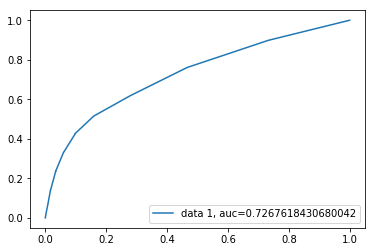

In [0]:
test_pred_proba = rf1.predict_proba(X_test1)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test1,  test_pred_proba)
auc = metrics.roc_auc_score(y_test1, test_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

## LogisticRegression With balanced

In [0]:
 lr_balanced=LogisticRegression(class_weight='balanced')

In [0]:
lr_model2=lr_balanced.fit(X_train1,y_train1)
pred_2=lr_model2.predict(X_test1)
print("Accuracy_score:",accuracy_score(y_test1,pred_2))
print("Confusion_matrix:\n",confusion_matrix(y_test1, pred_2))
print(classification_report(y_test1, pred_2, target_names=['not default', 'default']))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy_score: 0.6118888888888889
Confusion_matrix:
 [[4139 2848]
 [ 645 1368]]
              precision    recall  f1-score   support

 not default       0.87      0.59      0.70      6987
     default       0.32      0.68      0.44      2013

    accuracy                           0.61      9000
   macro avg       0.59      0.64      0.57      9000
weighted avg       0.74      0.61      0.64      9000



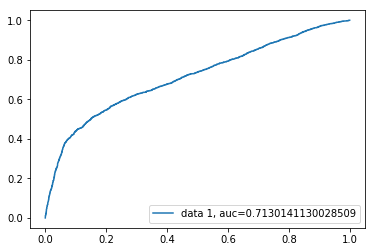

In [0]:
test_pred_proba = lr_model2.predict_proba(X_test1)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test1,  test_pred_proba)
auc = metrics.roc_auc_score(y_test1, test_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

##GridSearch

In [0]:
# Define function to optimize model based on ROC_auc
#(for unbalanced classes, roc_auc makes more sence since the accuracy score can be fooled by only predicting 0)

def gridsearchcv(model,params,X_train,y_train):
    gs=GridSearchCV(model,params,
                    scoring='roc_auc',
                    n_jobs=-1)
    gs.fit(X_train,y_train)
    print("Best Params:",gs.best_params_)
    print("Best auc on training set:",gs.best_score_)
    print('Best auc on test set:',gs.score(X_test,y_test))
    return gs.predict(X_test),gs.decision_function(X_test)

    

In [0]:
def plot_confusion(prediction):
    conmat=np.array(confusion_matrix(y_test,prediction,labels=[1,0]))
    confusion=pd.DataFrame(conmat,index=['default','not default'],
                           columns=['predicted default','not predicted default'])
    print(confusion)

In [0]:
#Define Function to plot Roc Curve
def plot_roc(prob):
    y_score = prob
    fpr=dict()
    tpr=dict()
    roc_auc=dict()
    fpr[1],tpr[1],_=roc_curve(y_test,y_score)
    roc_auc[1]=auc(fpr[1],tpr[1])
    plt.figure(figsize=[9,7])
    plt.plot(fpr[1], tpr[1], label='Roc curve (area=%0.2f)' %roc_auc[1], linewidth=4)
    plt.plot([1,0], [1,0], 'k--', linewidth=4)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('false positive rate', fontsize=18)
    plt.ylabel('true positive rate', fontsize=18)
    plt.title('ROC curve for credit default', fontsize=18)
    plt.legend(loc='lower right')
    plt.show()

## Decision Tree With balanced

In [0]:
DT2=DecisionTreeClassifier(class_weight='balanced')

In [0]:
DT22=DT2.fit(X_train1,y_train1)
predydt2=DT22.predict(X_test1)
print(classification_report(y_test1,predydt2))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83      6987
           1       0.40      0.40      0.40      2013

    accuracy                           0.73      9000
   macro avg       0.61      0.62      0.62      9000
weighted avg       0.73      0.73      0.73      9000



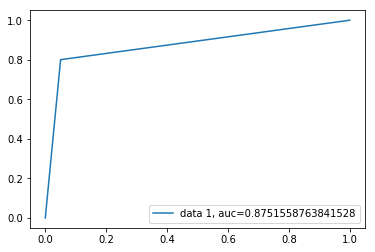

In [0]:
test_pred_proba = DT22.predict_proba(X_test1)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test1,  test_pred_proba)
auc = metrics.roc_auc_score(y_test1, test_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()